# Data Exploratory Project

### We are using the World Happiness Report 2021 for the project

In [2]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 # Reading the data
    
data=pd.read_csv('world-happiness-report-2021.csv')

In [4]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
# Setting up plot parameters to our choices

sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#EEE5B4'

In [6]:
data_columns=['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Generosity','Perceptions of corruption']

In [7]:
data = data[data_columns].copy()

In [8]:
data.columns = ['country_name','regional_indicator','happiness_score','logged_GDP_per_capita','social_support','healthy_life_expectancy','generosity','perceptions_of_corruption']

In [9]:
data.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.175,0.338


In [10]:
data.isnull().sum()

country_name                 0
regional_indicator           0
happiness_score              0
logged_GDP_per_capita        0
social_support               0
healthy_life_expectancy      0
generosity                   0
perceptions_of_corruption    0
dtype: int64

Text(0, 0.5, 'GDP per capita')

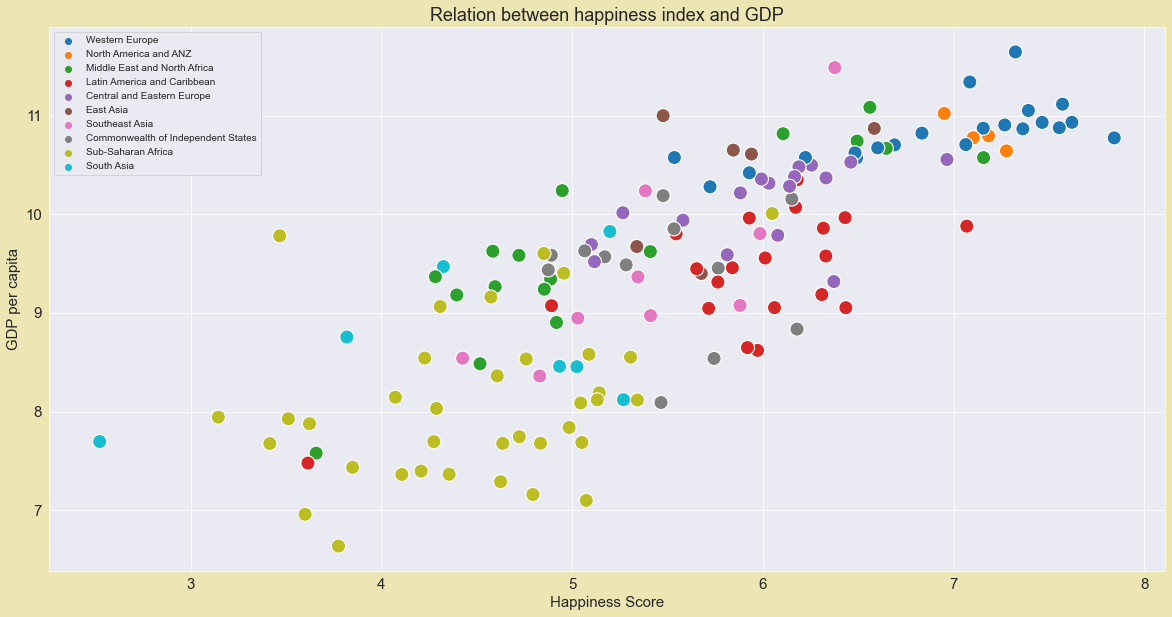

In [11]:
# Plotting to find the relationship between happiness index and GDP

plt.rcParams['figure.figsize']=(20,10)
plt.title('Relation between happiness index and GDP')
sns.scatterplot(x=data.happiness_score,y=data.logged_GDP_per_capita,hue=data.regional_indicator,s=200);
plt.legend (loc='upper left',fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [12]:
# Plotting to find GDP per region
gdp_region=data.groupby('regional_indicator')['logged_GDP_per_capita'].sum()

In [13]:
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

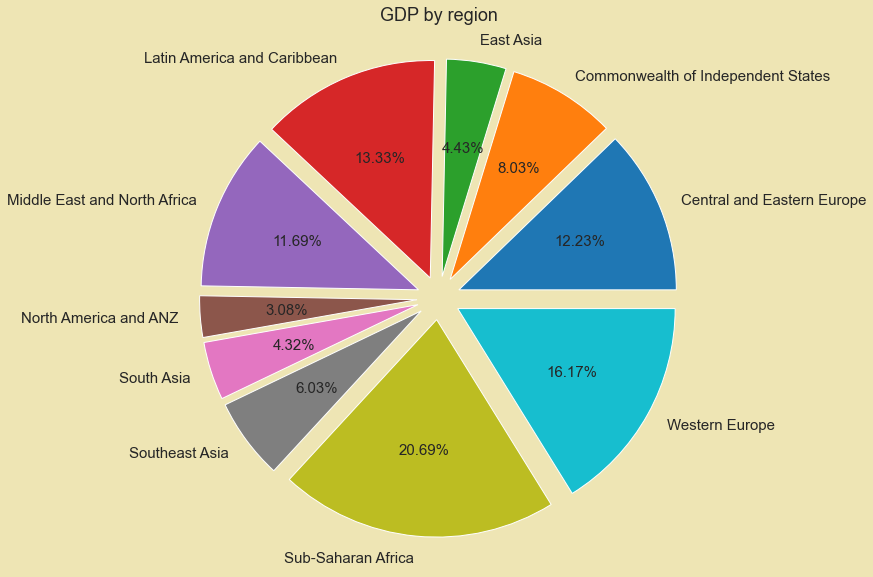

In [14]:
gdp_region.plot.pie(autopct = '%1.2f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('GDP by region')
plt.ylabel('')

In [15]:
total_country = data.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


In [16]:
# bar graph to visualiaze corruption perception by regions
corruption=data.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

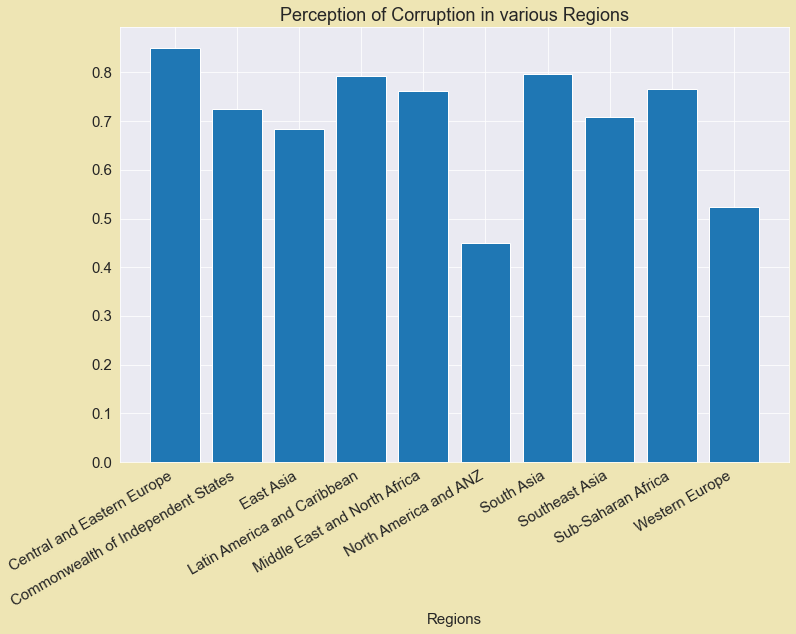

In [17]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption.perceptions_of_corruption)